# Assignment 1: Source Distribution on an Airfoil



Start the script off by importing the libraries needed and by allowing the plots to show in the Jupyter notebook.

In [1]:
import numpy
import math
from matplotlib import pyplot

%matplotlib inline

Get the strength and location data for the sources used to simulate the NACA0012 airfoil.

In [2]:
x_source = numpy.loadtxt("NACA0012_x.txt")
y_source = numpy.loadtxt("NACA0012_y.txt")
strength_source = numpy.loadtxt("NACA0012_sigma.txt")

Next, create the grid of points that the velocity will be ccalculated at using the same process shown in the lessons.

In [50]:
N = 51
x_start, x_end = -1.0, 2.0
y_start, y_end = -0.5, 0.5
x = numpy.linspace(x_start,x_end,N)
y = numpy.linspace(y_start,y_end,N)
X, Y = numpy.meshgrid(x,y)

Get freestream velocity inthe x and y directions as well as the freestream stream function.

In [51]:
u_inf = 1.0

u_freestream = u_inf*numpy.ones((N,N),dtype=float)
v_freestream = numpy.zeros((N,N),dtype=float)

psi_freestream = u_inf*Y

In [52]:
def get_velocity(strength, xs, ys, X, Y):
    
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

def get_stream_function(strength, xs, ys, X, Y):
    
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys),(X-xs))
    
    return psi

Since the total velocity of each point can be determined using the superposition of each individual source solution, the following loop adds the velocity solution of a new source with each iteration to the total source velocity at each point in the mesh grid.

In [53]:
u_source = 0
v_source = 0
psi_source = 0

for i in range(numpy.size(strength_source)):
    u, v = get_velocity(strength_source[i],x_source[i],y_source[i],X,Y)
    u_source += u
    v_source += v
    psi = get_stream_function(strength_source[i],x_source[i],y_source[i],X,Y)
    psi_source += psi

In [54]:
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

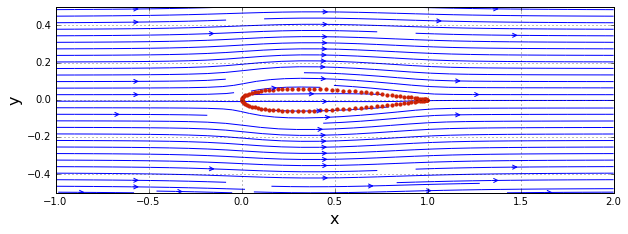

In [55]:
size = 10
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u,v,density=1,linewidth=1,arrowsize=1,arrowstyle='->')
pyplot.scatter(x_source,y_source,color='#CD2305',s=10,marker='o');

In [56]:
cp = 1.0 - (u**2+v**2)/u_inf**2

In [57]:
cpmax = numpy.amax(cp)
cpmax

0.47144366133162408

In [58]:
x_max, y_max = numpy.where(cp==cpmax)

array([25])

In [59]:
numpy.amin(cp)

-0.55237082967193096

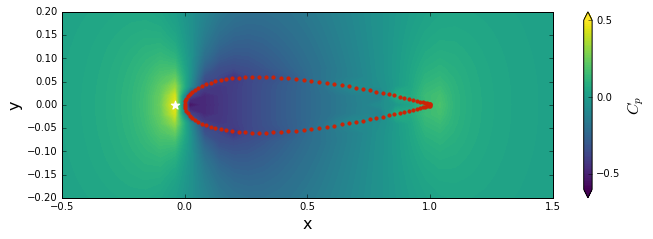

In [60]:
size = 10
pyplot.figure(figsize=(1.1*size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(-0.5,1.5)
pyplot.ylim(-0.2,0.2)
contf = pyplot.contourf(X,Y,cp,levels=numpy.linspace(-0.6,0.5,100),extend='both',cmap='viridis')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$',fontsize=16)
cbar.set_ticks([-1.0,-0.5,0.0,0.5])
pyplot.scatter(x_source,y_source,color='#CD2305',s=10,marker='o')
pyplot.scatter(x[y_max],y[x_max],color='w',s=80,marker='*');